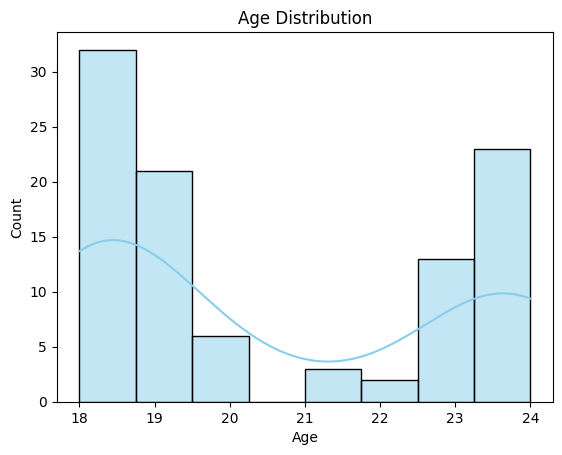

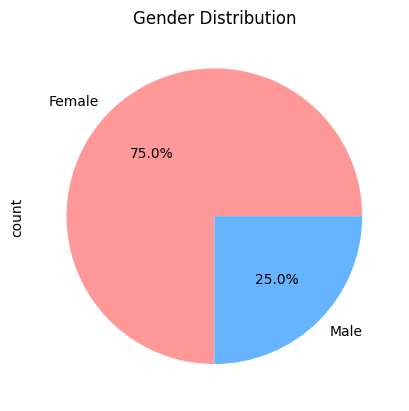

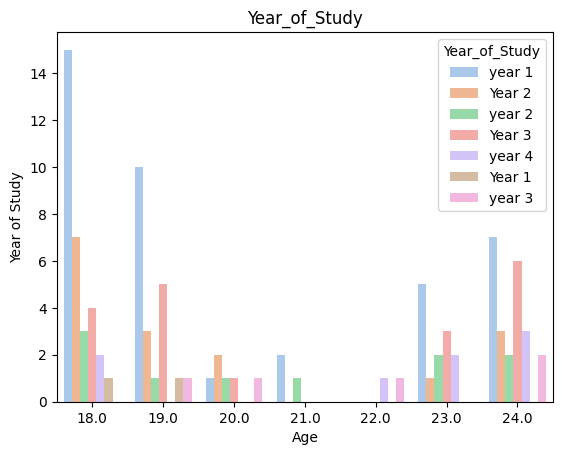

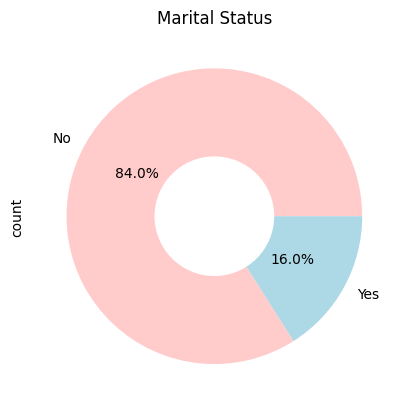

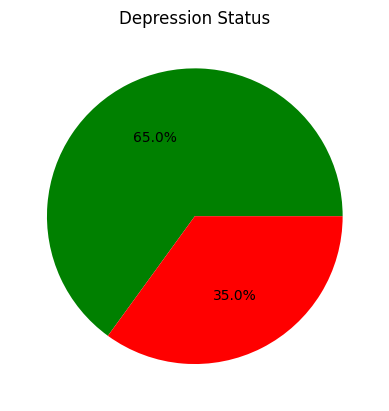

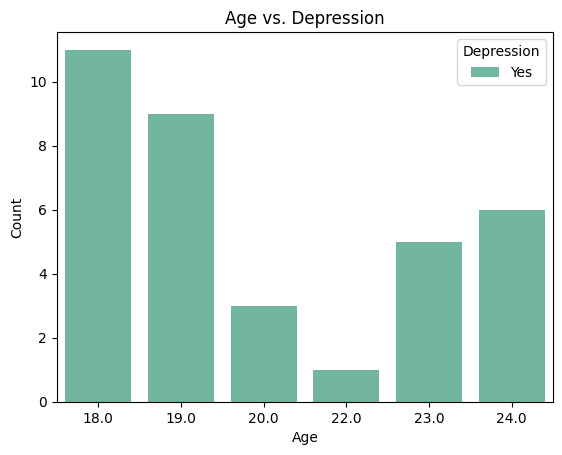

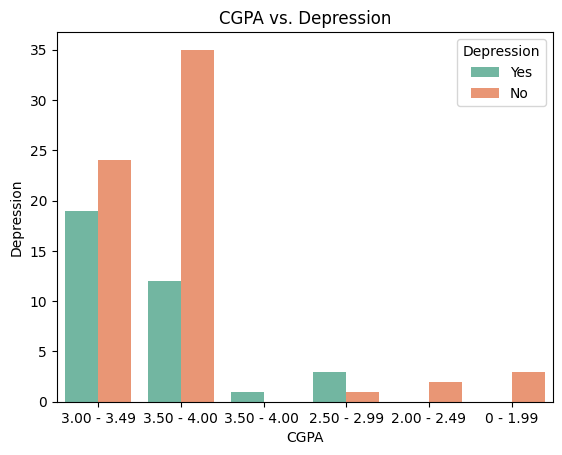

In [2]:
#A statistical research analysis was conducted on the dataset investigating the impact of mental health on students' GPA.
#Dataset and explanation can be found on Kaggle website in this url: https://www.kaggle.com/datasets/shariful07/student-mental-health

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Student Mental health.csv')

df.columns=['Gender','Age','Course','Year_of_Study','CGPA','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

#remove nulls
df =df.dropna()

"""data representation"""
#age distribution
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Gender distribution
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

#yer of study
sns.countplot(x='Age', hue='Year_of_Study', data=df, palette='pastel')
plt.title('Year_of_Study')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.show()

#marital status
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ffcccb', '#add8e6', '#90ee90'])
my_circle = plt.Circle((0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

#depression distribution
plt.pie(df['Depression'].value_counts(), autopct='%1.1f%%', colors=['green', 'red', '#66b3ff'])
plt.title('Depression Status')
plt.show()

#Age vs depression
df_depression = df[df['Depression'] == 'Yes']
sns.countplot(x='Age', hue='Depression', data=df_depression, palette='Set2')
plt.title('Age vs. Depression')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

"""As the number of samples with depression is less than ones with depression, the dataset is imbalanced"""

#lower gpa vs depression
sns.countplot(x='CGPA', hue='Depression', data=df, palette='Set2')
plt.title('CGPA vs. Depression')
plt.xlabel('CGPA')
plt.ylabel('Depression')
plt.show()

In [3]:
#import
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, silhouette_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier

In [5]:
"""preprocessing and clean data"""
df['Year_of_Study'] = df['Year_of_Study'].astype(str).str.extract('(\d+)').astype(int)

le=LabelEncoder()
cat_cols=['Gender','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']
df['Year_of_Study'] = df['Year_of_Study'].astype(str).str.extract('(\d+)').astype(int)
le_course = LabelEncoder()

df['Course'] = le_course.fit_transform(df['Course'])
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
    
def calculate_cgpa(x):
    if isinstance(x,str):
        first,second=x.split('-')
        return (float(first.strip())+float(second.strip()))/2
    else:
        return x
df['CGPA']=df['CGPA'].apply(calculate_cgpa)


"""define x and y"""
X=df[['Marital_Status','Course','CGPA','Anxiety','Panic_Atack']]
y=df['Depression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
"""Linear regression"""
model = LinearRegression()
model.fit(X_train, y_train)

print('\nCoefficient of model :', model.coef_)
print('\nIntercept of model',model.intercept_)


predict_test = model.predict(X_test)

rmse_train = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE (Root Mean Squared Error) : ', rmse_train)

y_pred = model.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

"""Precision and recall are computed using a confusion matrix, applicable to classification models. Regression algorithms predict numerical values, assessing proximity to actual values. """


Coefficient of model : [ 0.71646074  0.0024433  -0.04288803  0.31970963 -0.00939675]

Intercept of model 0.24293868438763855

RMSE (Root Mean Squared Error) :  0.4254254282582859
Accuracy: 0.85


'Precision and recall are computed using a confusion matrix, applicable to classification models. Regression algorithms predict numerical values, assessing proximity to actual values. '

In [7]:
"""Binary classification"""
"""Logistic Regression, Decision Tree, Support Vector Machine"""

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(report)

Model: Decision Tree
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.29      0.40      0.33         5

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.65      0.60      0.62        20

Model: Logistic Regression
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20

Model: Support Vector Machine
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.00      0.00      0.00         5

    accuracy                           0.60        20
   macro

In [ ]:
#Naive Bayes

models = {
    "Naive Bayes": GaussianNB(),
    "K-nearest Neighbour": KNeighborsClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(report)

In [ ]:
#k-means
df_encoded = pd.get_dummies(df)
model = KMeans(n_clusters=5)
model.fit(df_encoded)

df['Cluster'] = model.labels_
print(df)

In [ ]:
#Random forest
model = RandomForestClassifier()
model.fit(X_train,y_train)

predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
report = classification_report(y_test, predictions)

print('Accuracy : ', accuracy_test)
print(report)

In [ ]:
#Comparision
Linear Regression:
Accuracy: 0.85
RMSE: 0.425
It is a regression model, not classification.

Decision Tree:
Accuracy: 0.6
Precision (class 1): 0.29
Recall (class 1): 0.40
F1-score: 0.33 (class 1)

Logistic Regression:
Accuracy: 0.8
Precision (class 1): 0.67
Recall (class 1): 0.40
F1-score: 0.50 (class 1)

Support Vector Machine:
Accuracy: 0.6
Precision (class 1): 0.00
Recall (class 1): 0.00
F1-score: 0.00 (class 1)

Naive Bayes:
Accuracy: 0.85
Precision (class 1): 1.00
Recall (class 1): 0.40
F1-score: 0.57 (class 1)

K-nearest Neighbour:
Accuracy: 0.5
Precision (class 1): 0.00
Recall (class 1): 0.00
F1-score: 0.00 (class 1)

Random Forest:
Accuracy: 0.7
Precision (class 1): 0.00
Recall (class 1): 0.00
F1-score: 0.00 (class 1)
    
I think Logistic Regression and Naive Bayes are better choices. 
Both models have higher accuracy and better precision-recall compared to the other models.